In [36]:
#! -*- coding: UTF8 -*-
import os
os.chdir(os.getcwd())

## Import Module

In [37]:
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
sns.set(font='TH Sarabun New')

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics

## Import Data

In [39]:
df = pd.read_excel('process_data/GPP_6210501001_real.xlsx',sheet_name="ForCluster") #ตัวอย่าง
df.head()

,Year,Province,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, steam and air conditioning supply","Water supply sewerage, waste management and remediation activities",Construction,Wholesale and retail trade and repair of motor vehicles,Transportation and storage,...,การนำเข้าสินค้าและบริการ (คิดเป็น % ของจีดีพี),มูลค่าเพิ่มของอุตสาหกรรม (คิดเป็น % ของจีดีพี),จำนวนประชากรทั้งหมด (คน),ค่าใช้จ่ายในการวิจัยและพัฒนา (คิดเป็น % ของจีดีพี),รายจ่ายของประชากร (บาท),เนื้อที่ที่ถือครองเพื่อการเกษตร (ไร่),เนื้อที่สวนผักและไม้ดอก (ไร่),เนื้อที่สำหรับปลูกนาข้าว (ไร่),จำนวนโรงงานอุตสาหกรรม (โรงงาน),GPP Per capita (Baht)
0,2016,พระนครศรีอยุธยา,9196.000000,2261.000000,272229.000000,6750.000000,716.000000,4024.000000,44196.000000,12904.000000,...,53.504343,35.586765,68971313,0.77817,23095.32,1178345,9711,1065315,121,444803.565
1,2017,พระนครศรีอยุธยา,10334.000000,2190.000000,268841.000000,9169.000000,801.000000,4736.000000,46668.000000,14165.000000,...,54.218595,35.018760,69209817,1.00179,23780.19,1178698,9720,1065376,117,449602.967
2,2018,พระนครศรีอยุธยา,11377.000000,2464.000000,265997.000000,9679.000000,921.000000,5058.000000,48725.000000,16430.000000,...,56.019636,34.751173,69428454,1.00179,22790.08,1178475,9713,1065197,96,454952.541
3,2016,ลพบุรี,15961.808110,1075.216017,34521.386075,2354.156047,324.975118,2148.052847,9864.379851,2253.990953,...,53.504343,35.586765,68971313,0.77817,15875.50,2191454,20629,812485,31,444803.565
4,2017,ลพบุรี,18110.396809,1293.974261,38776.266120,2482.891414,399.409002,2011.361671,11186.072061,2551.939286,...,54.218595,35.018760,69209817,1.00179,16012.15,2191311,20523,813167,19,449602.967


<AxesSubplot:>

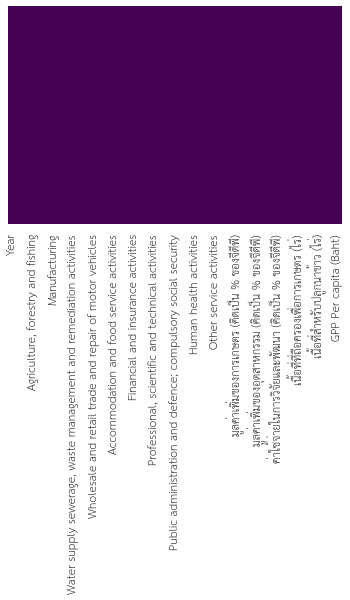

In [40]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [41]:
df2 = df.drop(["Province","Year"],axis=1)
df2.head()

,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, steam and air conditioning supply","Water supply sewerage, waste management and remediation activities",Construction,Wholesale and retail trade and repair of motor vehicles,Transportation and storage,Accommodation and food service activities,Information and communication,...,การนำเข้าสินค้าและบริการ (คิดเป็น % ของจีดีพี),มูลค่าเพิ่มของอุตสาหกรรม (คิดเป็น % ของจีดีพี),จำนวนประชากรทั้งหมด (คน),ค่าใช้จ่ายในการวิจัยและพัฒนา (คิดเป็น % ของจีดีพี),รายจ่ายของประชากร (บาท),เนื้อที่ที่ถือครองเพื่อการเกษตร (ไร่),เนื้อที่สวนผักและไม้ดอก (ไร่),เนื้อที่สำหรับปลูกนาข้าว (ไร่),จำนวนโรงงานอุตสาหกรรม (โรงงาน),GPP Per capita (Baht)
0,9196.000000,2261.000000,272229.000000,6750.000000,716.000000,4024.000000,44196.000000,12904.000000,2648.000000,1460.000000,...,53.504343,35.586765,68971313,0.77817,23095.32,1178345,9711,1065315,121,444803.565
1,10334.000000,2190.000000,268841.000000,9169.000000,801.000000,4736.000000,46668.000000,14165.000000,2987.000000,1576.000000,...,54.218595,35.018760,69209817,1.00179,23780.19,1178698,9720,1065376,117,449602.967
2,11377.000000,2464.000000,265997.000000,9679.000000,921.000000,5058.000000,48725.000000,16430.000000,3360.000000,1769.000000,...,56.019636,34.751173,69428454,1.00179,22790.08,1178475,9713,1065197,96,454952.541
3,15961.808110,1075.216017,34521.386075,2354.156047,324.975118,2148.052847,9864.379851,2253.990953,449.196431,485.758819,...,53.504343,35.586765,68971313,0.77817,15875.50,2191454,20629,812485,31,444803.565
4,18110.396809,1293.974261,38776.266120,2482.891414,399.409002,2011.361671,11186.072061,2551.939286,495.095478,608.027689,...,54.218595,35.018760,69209817,1.00179,16012.15,2191311,20523,813167,19,449602.967


In [42]:
df2.describe()

,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, steam and air conditioning supply","Water supply sewerage, waste management and remediation activities",Construction,Wholesale and retail trade and repair of motor vehicles,Transportation and storage,Accommodation and food service activities,Information and communication,...,การนำเข้าสินค้าและบริการ (คิดเป็น % ของจีดีพี),มูลค่าเพิ่มของอุตสาหกรรม (คิดเป็น % ของจีดีพี),จำนวนประชากรทั้งหมด (คน),ค่าใช้จ่ายในการวิจัยและพัฒนา (คิดเป็น % ของจีดีพี),รายจ่ายของประชากร (บาท),เนื้อที่ที่ถือครองเพื่อการเกษตร (ไร่),เนื้อที่สวนผักและไม้ดอก (ไร่),เนื้อที่สำหรับปลูกนาข้าว (ไร่),จำนวนโรงงานอุตสาหกรรม (โรงงาน),GPP Per capita (Baht)
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000e+00,9.00000,9.000000,9.000000e+00,9.000000,9.000000e+00,9.000000,9.000000
mean,10639.188255,1149.676836,104112.033089,3863.420673,451.753654,2548.135604,20300.727567,5914.439813,1208.317814,792.371844,...,54.580858,35.118899,6.920319e+07,0.92725,19776.372222,1.287271e+06,10873.444444,7.411279e+05,48.444444,449786.357667
std,6571.377032,985.545876,124303.419992,3657.622218,298.051380,1692.934392,19993.655560,6546.881095,1364.212971,633.020532,...,1.122531,0.369535,1.980102e+05,0.11181,3031.546868,7.405333e+05,7934.546287,3.163887e+05,48.513171,4396.787398
min,2456.234345,44.789843,7184.480850,625.101372,107.980249,783.996416,2937.145474,678.316941,116.112820,184.197732,...,53.504343,34.751173,6.897131e+07,0.77817,15875.500000,4.913220e+05,2344.000000,3.451240e+05,5.000000,444803.565000
25%,4314.323732,49.939609,7879.749099,763.740013,200.170544,816.347205,3726.871108,773.163845,137.406133,221.698824,...,53.504343,34.751173,6.897131e+07,0.77817,17016.830000,4.921130e+05,2348.000000,3.454090e+05,11.000000,444803.565000
50%,10334.000000,1075.216017,34521.386075,2354.156047,399.409002,2148.052847,11186.072061,2551.939286,495.095478,608.027689,...,54.218595,35.018760,6.920982e+07,1.00179,19773.040000,1.178475e+06,9713.000000,8.128340e+05,30.000000,449602.967000
75%,15961.808110,2190.000000,265997.000000,6750.000000,716.000000,4024.000000,44196.000000,12904.000000,2648.000000,1460.000000,...,56.019636,35.586765,6.942845e+07,1.00179,22790.080000,2.191311e+06,20523.000000,1.065197e+06,96.000000,454952.541000
max,20601.412909,2464.000000,272229.000000,9679.000000,921.000000,5058.000000,48725.000000,16430.000000,3360.000000,1769.000000,...,56.019636,35.586765,6.942845e+07,1.00179,23780.190000,2.191867e+06,20629.000000,1.065376e+06,121.000000,454952.541000


In [43]:
list1 = list(df2.columns.values)
list1

['Agriculture, forestry and fishing',
 'Mining and quarrying',
 'Manufacturing',
 'Electricity, gas, steam and air conditioning supply',
 'Water supply sewerage, waste management and remediation activities',
 'Construction',
 'Wholesale and retail trade and repair of motor vehicles',
 'Transportation and storage',
 'Accommodation and food service activities',
 'Information and communication',
 'Financial and insurance activities',
 'Real estate activities',
 'Professional, scientific and technical activities',
 'Administrative and support service activities',
 'Public administration and defence; compulsory social security',
 'Education',
 'Human health activities',
 'Arts, entertainment and recreation',
 'Other service activities',
 'การค้าสินค้า (คิดเป็น % ของจีดีพี)',
 'มูลค่าเพิ่มของการเกษตร (คิดเป็น % ของจีดีพี)',
 'การนำเข้าสินค้าและบริการ (คิดเป็น % ของจีดีพี)',
 'มูลค่าเพิ่มของอุตสาหกรรม (คิดเป็น % ของจีดีพี)',
 'จำนวนประชากรทั้งหมด (คน)',
 'ค่าใช้จ่ายในการวิจัยและพัฒนา (คิดเป็น

## Cluster by K-Mean

#### ก่อนตัดปัจจัยที่ไม่ส่งผลออก

In [44]:
scaler = StandardScaler()
array_normalized = scaler.fit_transform(df2)
df_normalized = pd.DataFrame(array_normalized)
df_normalized.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,-0.232939,1.196024,1.434514,0.837068,0.940360,0.924661,1.267640,1.132379,1.119337,1.118647,...,-1.017180,1.342896,-1.242096,-1.414214,1.161214,-0.156014,-0.155391,1.086803,1.586307,-1.202025
1,-0.049259,1.119612,1.405605,1.538545,1.242845,1.370745,1.398780,1.336673,1.382905,1.313011,...,-0.342296,-0.287427,0.035473,0.707107,1.400833,-0.155508,-0.154188,1.087008,1.498854,-0.044240
2,0.119087,1.414496,1.381337,1.686438,1.669883,1.572485,1.507903,1.703626,1.672909,1.636393,...,1.359477,-1.055469,1.206623,0.707107,1.054419,-0.155828,-0.155124,1.086408,1.039723,1.246266
3,0.859103,-0.080136,-0.593805,-0.437666,-0.451160,-0.250661,-0.553647,-0.593029,-0.590208,-0.513747,...,-1.017180,1.342896,-1.242096,-1.414214,-1.364815,1.295054,1.304086,0.239217,-0.381394,-1.202025
4,1.205898,0.155295,-0.557499,-0.400335,-0.186276,-0.336301,-0.483531,-0.544759,-0.554522,-0.308879,...,-0.342296,-0.287427,0.035473,0.707107,-1.317004,1.294849,1.289916,0.241504,-0.643754,-0.044240


Text(0, 0.5, 'SSE')

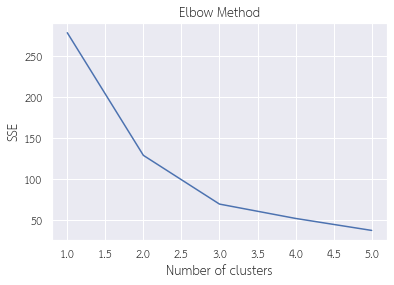

In [54]:
max_k = 6
sse = []
for i in range(1, max_k):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_normalized)
    sse.append(kmeans.inertia_)
plt.plot(range(1, max_k), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

In [55]:
# Choose value for k
k = 2
cluster_predictions = kmeans.predict(df_normalized)
df2['cluster_id'] = cluster_predictions
df2.tail(10)

,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, steam and air conditioning supply","Water supply sewerage, waste management and remediation activities",Construction,Wholesale and retail trade and repair of motor vehicles,Transportation and storage,Accommodation and food service activities,Information and communication,...,มูลค่าเพิ่มของอุตสาหกรรม (คิดเป็น % ของจีดีพี),จำนวนประชากรทั้งหมด (คน),ค่าใช้จ่ายในการวิจัยและพัฒนา (คิดเป็น % ของจีดีพี),รายจ่ายของประชากร (บาท),เนื้อที่ที่ถือครองเพื่อการเกษตร (ไร่),เนื้อที่สวนผักและไม้ดอก (ไร่),เนื้อที่สำหรับปลูกนาข้าว (ไร่),จำนวนโรงงานอุตสาหกรรม (โรงงาน),GPP Per capita (Baht),cluster_id
0,9196.000000,2261.000000,272229.000000,6750.000000,716.000000,4024.000000,44196.000000,12904.000000,2648.000000,1460.000000,...,35.586765,68971313,0.77817,23095.32,1178345,9711,1065315,121,444803.565,1
1,10334.000000,2190.000000,268841.000000,9169.000000,801.000000,4736.000000,46668.000000,14165.000000,2987.000000,1576.000000,...,35.018760,69209817,1.00179,23780.19,1178698,9720,1065376,117,449602.967,1
2,11377.000000,2464.000000,265997.000000,9679.000000,921.000000,5058.000000,48725.000000,16430.000000,3360.000000,1769.000000,...,34.751173,69428454,1.00179,22790.08,1178475,9713,1065197,96,454952.541,3
3,15961.808110,1075.216017,34521.386075,2354.156047,324.975118,2148.052847,9864.379851,2253.990953,449.196431,485.758819,...,35.586765,68971313,0.77817,15875.50,2191454,20629,812485,31,444803.565,0
4,18110.396809,1293.974261,38776.266120,2482.891414,399.409002,2011.361671,11186.072061,2551.939286,495.095478,608.027689,...,35.018760,69209817,1.00179,16012.15,2191311,20523,813167,19,449602.967,0
5,20601.412909,921.728770,34067.300287,2187.843935,457.133928,2569.131956,12069.243621,2719.048888,557.098057,614.871381,...,34.751173,69428454,1.00179,17016.83,2191867,20527,812834,30,454952.541,4
6,2456.234345,49.939609,7879.749099,759.053276,107.980249,783.996416,2937.145474,678.316941,116.112820,184.197732,...,35.586765,68971313,0.77817,19381.46,491322,2348,345244,11,444803.565,2
7,3401.518392,44.789843,7512.115366,763.740013,138.114047,786.330345,3333.835985,754.498400,124.951411,211.792147,...,35.018760,69209817,1.00179,20262.78,491855,2346,345124,6,449602.967,2
8,4314.323732,46.443027,7184.480850,625.101372,200.170544,816.347205,3726.871108,773.163845,137.406133,221.698824,...,34.751173,69428454,1.00179,19773.04,492113,2344,345409,5,454952.541,2


In [56]:
df2.cluster_id.value_counts()

2    3
1    2
0    2
3    1
4    1
Name: cluster_id, dtype: int64

In [57]:
print(metrics.silhouette_score(df2,kmeans.labels_))

0.3232857204293999


In [58]:
print(metrics.davies_bouldin_score(df2,kmeans.labels_))

0.3352071627568841


In [60]:
df2[df2.cluster_id==0].mean()

Agriculture, forestry and fishing                                     1.703610e+04
Mining and quarrying                                                  1.184595e+03
Manufacturing                                                         3.664883e+04
Electricity, gas, steam and air conditioning supply                   2.418524e+03
Water supply sewerage, waste management and remediation activities    3.621921e+02
Construction                                                          2.079707e+03
Wholesale and retail trade and repair of motor vehicles               1.052523e+04
Transportation and storage                                            2.402965e+03
Accommodation and food service activities                             4.721460e+02
Information and communication                                         5.468933e+02
Financial and insurance activities                                    4.772529e+03
Real estate activities                                                3.160562e+03
Prof

In [61]:
df2[df2.cluster_id==1].mean()

Agriculture, forestry and fishing                                     9.765000e+03
Mining and quarrying                                                  2.225500e+03
Manufacturing                                                         2.705350e+05
Electricity, gas, steam and air conditioning supply                   7.959500e+03
Water supply sewerage, waste management and remediation activities    7.585000e+02
Construction                                                          4.380000e+03
Wholesale and retail trade and repair of motor vehicles               4.543200e+04
Transportation and storage                                            1.353450e+04
Accommodation and food service activities                             2.817500e+03
Information and communication                                         1.518000e+03
Financial and insurance activities                                    8.028000e+03
Real estate activities                                                4.677000e+03
Prof

In [62]:
df2[df2.cluster_id==2].mean()

Agriculture, forestry and fishing                                     3.390692e+03
Mining and quarrying                                                  4.705749e+01
Manufacturing                                                         7.525448e+03
Electricity, gas, steam and air conditioning supply                   7.159649e+02
Water supply sewerage, waste management and remediation activities    1.487549e+02
Construction                                                          7.955580e+02
Wholesale and retail trade and repair of motor vehicles               3.332618e+03
Transportation and storage                                            7.353264e+02
Accommodation and food service activities                             1.261568e+02
Information and communication                                         2.058962e+02
Financial and insurance activities                                    1.527105e+03
Real estate activities                                                9.518605e+02
Prof

In [63]:
df2[df2.cluster_id==3].mean()

Agriculture, forestry and fishing                                     1.137700e+04
Mining and quarrying                                                  2.464000e+03
Manufacturing                                                         2.659970e+05
Electricity, gas, steam and air conditioning supply                   9.679000e+03
Water supply sewerage, waste management and remediation activities    9.210000e+02
Construction                                                          5.058000e+03
Wholesale and retail trade and repair of motor vehicles               4.872500e+04
Transportation and storage                                            1.643000e+04
Accommodation and food service activities                             3.360000e+03
Information and communication                                         1.769000e+03
Financial and insurance activities                                    8.467000e+03
Real estate activities                                                4.806000e+03
Prof

In [64]:
df2[df2.cluster_id==4].mean()

Agriculture, forestry and fishing                                     2.060141e+04
Mining and quarrying                                                  9.217288e+02
Manufacturing                                                         3.406730e+04
Electricity, gas, steam and air conditioning supply                   2.187844e+03
Water supply sewerage, waste management and remediation activities    4.571339e+02
Construction                                                          2.569132e+03
Wholesale and retail trade and repair of motor vehicles               1.206924e+04
Transportation and storage                                            2.719049e+03
Accommodation and food service activities                             5.570981e+02
Information and communication                                         6.148714e+02
Financial and insurance activities                                    4.933982e+03
Real estate activities                                                3.817795e+03
Prof

#### หลังตัดปัจจัยที่ไม่ส่งผลออก